In [2]:
#install a compatible version of imgaug
!pip uninstall -y imgaug && pip uninstall -y albumentations && pip install git+https://github.com/aleju/imgaug.git
!pip install face_recognition

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Successfully uninstalled imgaug-0.2.9
Found existing installation: albumentations 0.1.12
Uninstalling albumentations-0.1.12:
  Successfully uninstalled albumentations-0.1.12
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-wbkomisr
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-wbkomisr
  Created wheel for imgaug: filename=imgaug-0.4.0-py3-none-any.whl size=971122 sha256=becd0a528a723bb1f11bedf03e2ef847d04fced2c692eb3af329e0f5a9d0db3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-u8519x3j/wheels/0c/78/b5/9303fae9d5e03df1f319adfe4e6534180b5c3232de11bc9a2f
Successfully built imgaug
     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=2a2eb14adf4221fd3af9c5c5966c29c772cc7787dd6b292cb3d56dddf53ce062
  Stored in directory: /root/.

In [3]:
# import opencv and cv2
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

     |████████████████████████████████| 49.9 MB 14 kB/s 


In [4]:
#more imports for face detection
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [5]:
#import imshow so image can be shown here after being read
from google.colab.patches import cv2_imshow

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Training image:


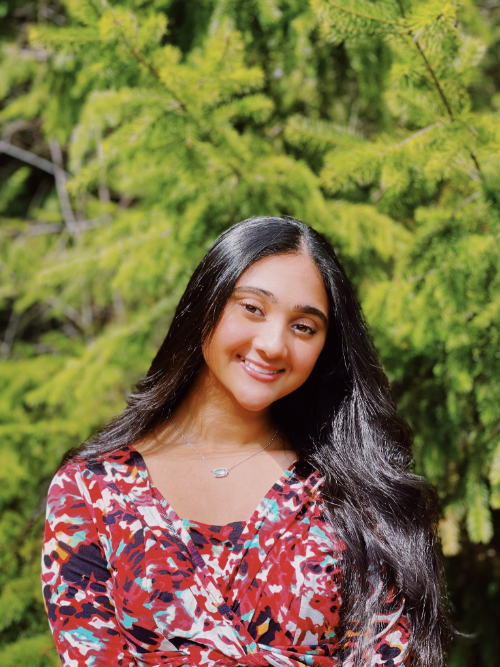

Final image:


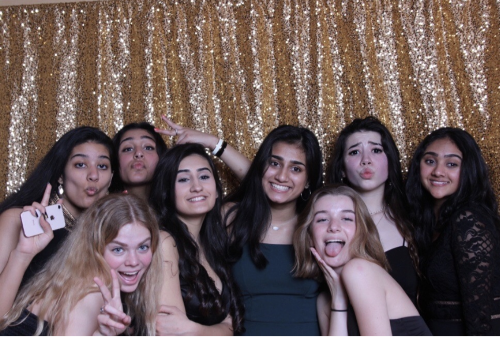

In [9]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img,(width,height))


  
img_known = read_img("/content/drive/MyDrive/Screen Shot 2021-07-19 at 12.27.53 PM.png")
img_knownEncoding = face_recognition.face_encodings(img_known)[0]
print("Training image:")
cv2_imshow(img_known)

img_unknown = read_img("/content/drive/MyDrive/Screen Shot 2021-07-19 at 12.42.42 PM.png")
img_unknownEncoding = face_recognition.face_encodings(img_unknown)
print("Final image:")
cv2_imshow(img_unknown)





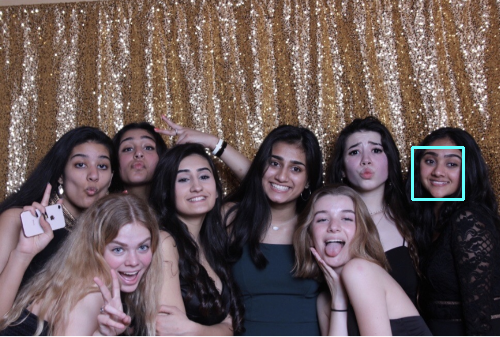

In [8]:
for index, i in enumerate(img_unknownEncoding):
  
  results = face_recognition.compare_faces([img_knownEncoding], i)
  if results[0] == True :
    #res = [i for i, val in enumerate(results) if val] 
    (top,right,bottom,left) = face_recognition.face_locations(img_unknown)[index]
    cv2.rectangle(img_unknown,(left,top),(right,bottom),(255,255,100),2)
    
cv2_imshow(img_unknown)


